### Laboratorium 5 - zadania - transformacja Hougha

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### Zadanie 1

Zbadaj wpływ parametrów transformacji Hougha na jakość detekcji prostych na przykładzie obrazu `norway`. Wykorzystaj ulubiony detektor krawędzi i zaprezentuj jego wynik przed użyciem transformacji Hougha. Zapoznaj się z dokumentacją funkcji [`cv2.HoughLines`](https://docs.opencv.org/4.5.3/dd/d1a/group__imgproc__feature.html#ga46b4e588934f6c8dfd509cc6e0e4545a), zwłaszcza parametrami sterującymi rozdzielczością `rho`, `theta` oraz progiem (`threshold`). Błędnie dobrany próg może szczególnie negatywnie wpłynąć na wyniki.

Zacznij od znalezienia odpowiednich parametrów detektora krawędzi - jeśli na tym etapie wyniki będą słabe, to dalej będzie tylko gorzej (_garbage-in, garbage-out_) - ale nie skupiaj się na badaniu ich wpływu na wyniki.

Zadanie _nie_ polega na zrobieniu grid searcha parametrów transformacji Hougha, tylko na zrozumieniu zachowania parametrów `rho` i `theta`, oraz wpływu progu.

Ostateczny rezultat zaprezentuj w postaci odcinków naniesionych na kopię obrazu wejściowego (patrz komórka `[3]`).

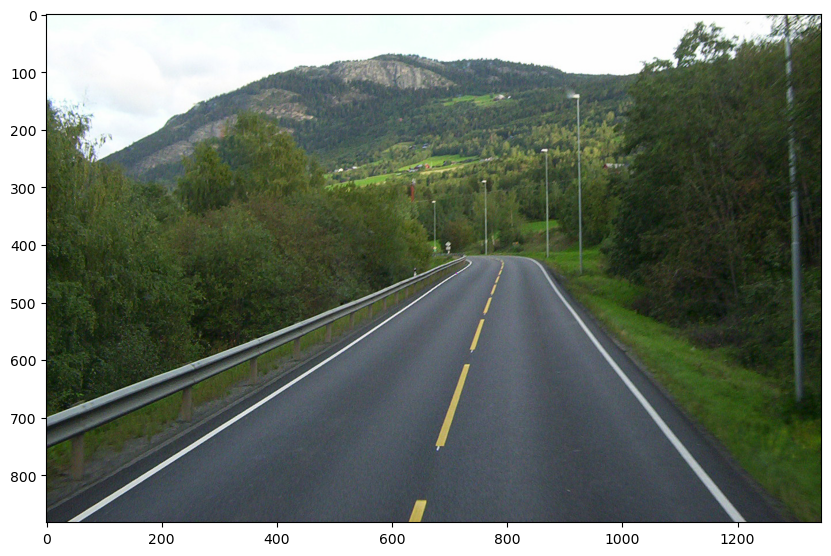

In [2]:
norway = cv2.imread('Lab5_dane/norway.jpg')
plt.subplots(1, 1, figsize=(10,10))[1].imshow(norway[..., ::-1]);

In [3]:
def rhotheta2xy(line):
    # konwersja parametrów prostej w układzie rho-theta do odcinka w układzie kartezjańskim
    # wynik można użyć jako argumenty funkcji cv2.line
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 5000*(-b))
    y1 = int(y0 + 5000*(a))
    x2 = int(x0 - 5000*(-b))
    y2 = int(y0 - 5000*(a))
    return x1, y1, x2, y2

Rozwiązanie:

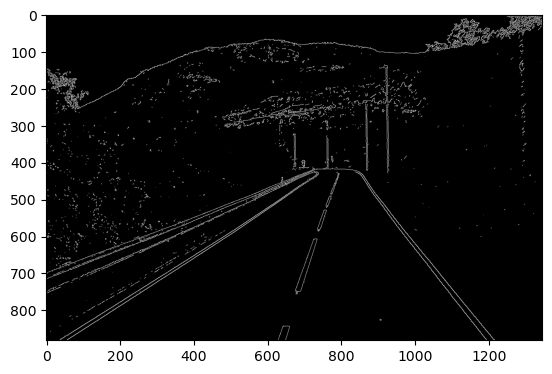

In [4]:
edges = cv2.Canny(norway, 200, 250)

plt.imshow(edges, cmap='gray');

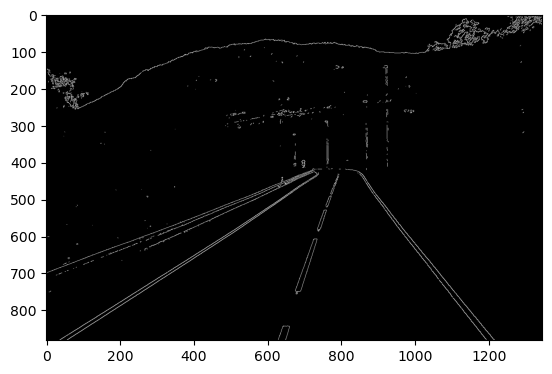

In [5]:
edges = cv2.Canny(norway, 330, 380)

plt.imshow(edges, cmap='gray');

In [6]:
def hough_lines_transform(edges, image, rho=1, theta=np.pi/180, thresholds=[50, 100, 150, 250]):
    fig, axs = plt.subplots(1, len(thresholds), figsize=(20, 5))

    for i, t in enumerate(thresholds):
        lines = cv2.HoughLines(edges, rho, theta, t)
        image_copy = image.copy()
        if lines is not None:
            for line in lines:
                x1, y1, x2, y2 = rhotheta2xy(line)
                cv2.line(image_copy, (x1, y1), (x2, y2), (0, 0, 255), 2)
        axs[i].imshow(image_copy[..., ::-1])
        axs[i].set_title(f'threshold: {t}')

    # Subtitle
    fig.suptitle(f' theta: np.pi/{np.pi/theta}, rho: {rho}', fontsize=16)
    plt.show()

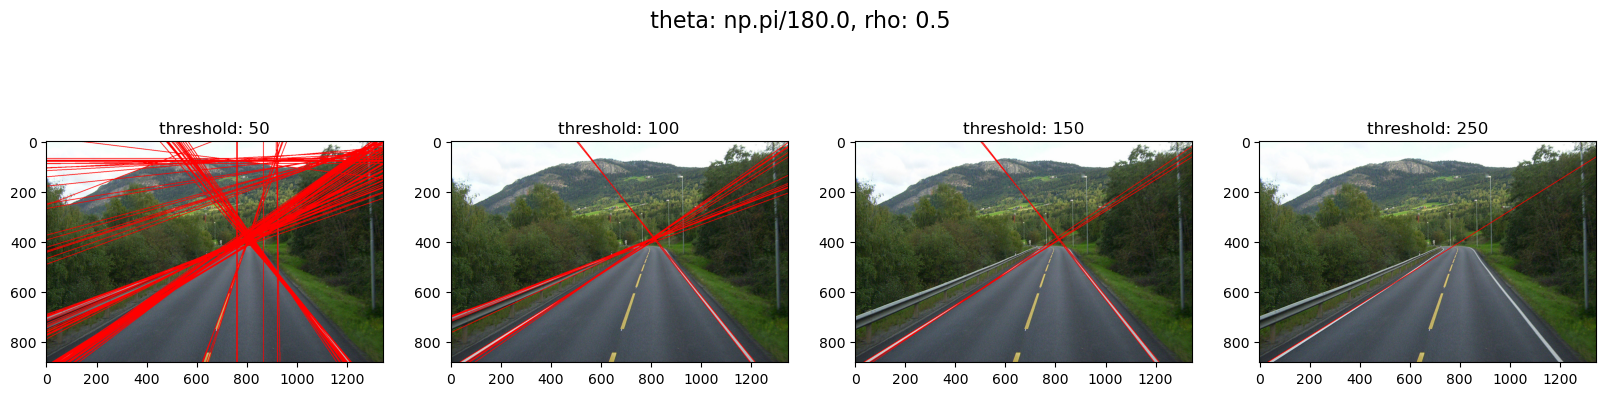

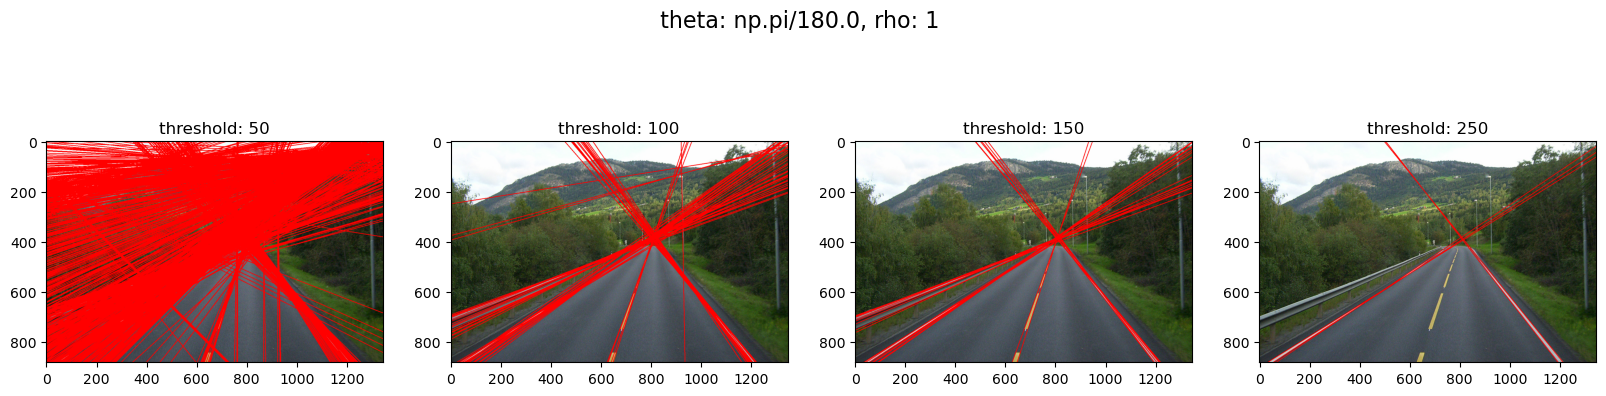

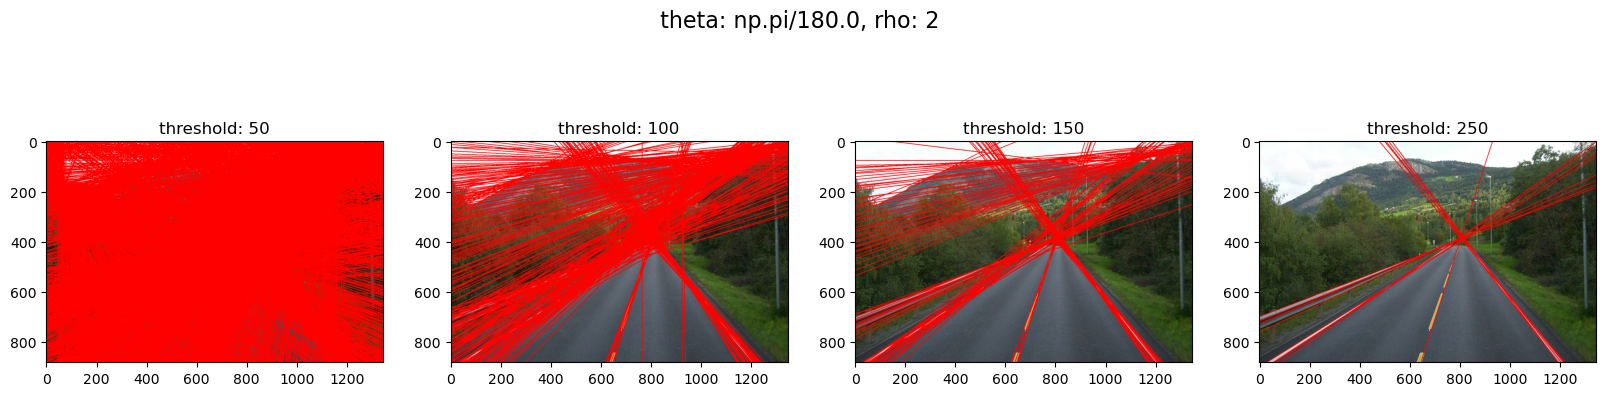

In [7]:
hough_lines_transform(edges, norway, rho=0.5, theta=np.pi/180, thresholds=[50, 100, 150, 250])
hough_lines_transform(edges, norway, rho=1, theta=np.pi/180, thresholds=[50, 100, 150, 250])
hough_lines_transform(edges, norway, rho=2, theta=np.pi/180, thresholds=[50, 100, 150, 250])

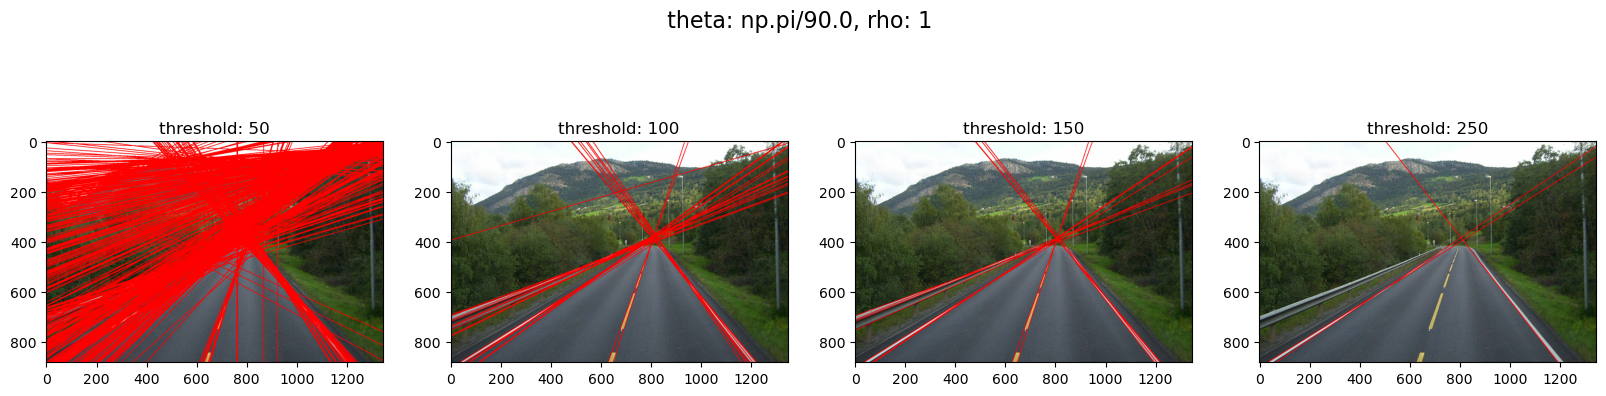

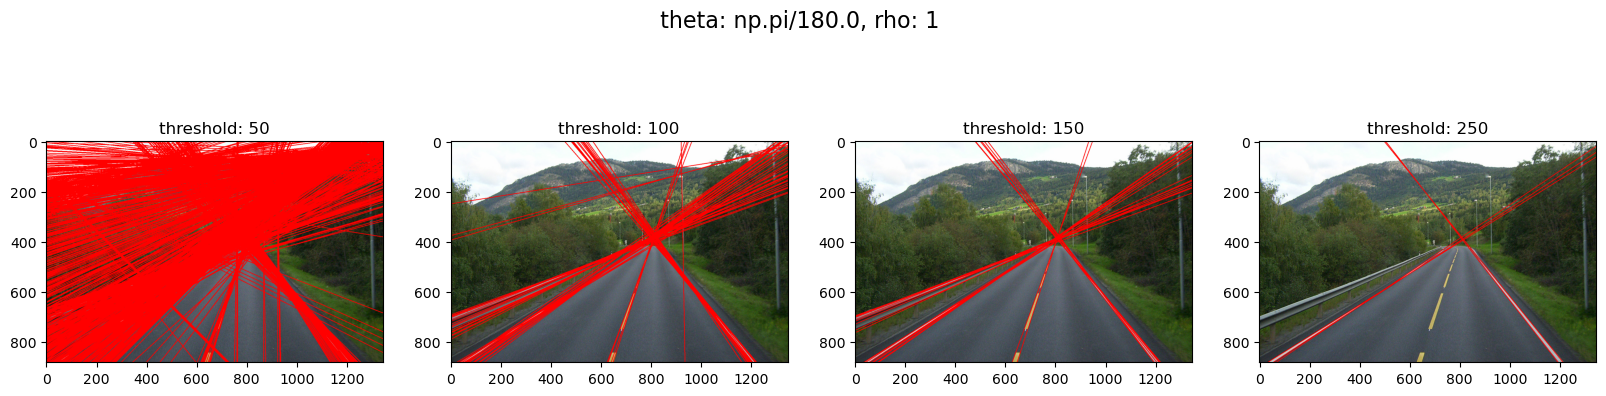

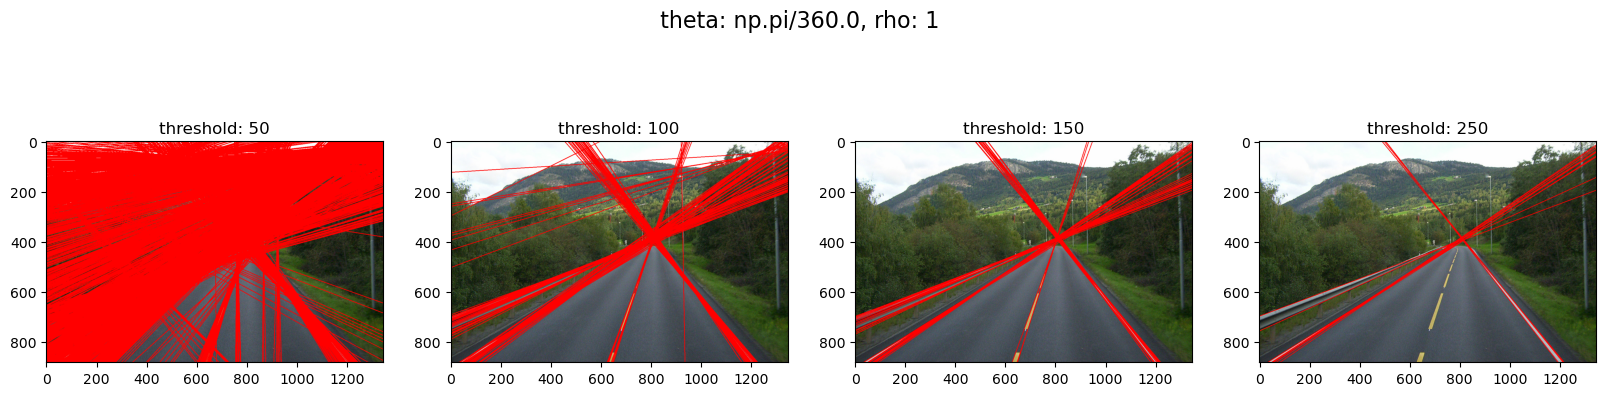

In [8]:
hough_lines_transform(edges, norway, rho=1, theta=np.pi/90, thresholds=[50, 100, 150, 250])
hough_lines_transform(edges, norway, rho=1, theta=np.pi/180, thresholds=[50, 100, 150, 250])
hough_lines_transform(edges, norway, rho=1, theta=np.pi/360, thresholds=[50, 100, 150, 250])

- rho określa rozdzielczość akumulatora w pikselach.
    - Mniejsza wartość nie wykryjemy linii oddalonych od układu współrzędnych.
    - Większa wartość zwiększa szansę na wykrycie linii oddalonych od układu współrzędnych ale wymaga więcej pamięci i czasu obliczeń.
- theta określa rozdzielczość kąta w radianach. 
    - Za mały zakres kątów może spowodować, że linie nie zostaną wykryte.
    - Za duży zakres kątów może spowodować, że linie będą wykrywane w wielu miejscach również z szumu.

Rozdzielczość histogramu determinuje jakość detekcji linii:
- mała rozdzielczość – niedokładna lokalizacja, łatwe wykrycie,
- duża rozdzielczość – dokładna lokalizacja, trudne wykrycie.


#### Zadanie 2

Dany jest obraz `pillbox`. Wykorzystaj transformację Hougha dla prostych, aby wykryć krawędzie między komórkami organizera.

Dla odmiany, w tym zadaniu nie jest istotne badanie parametrów ale wyłącznie końcowy wynik.

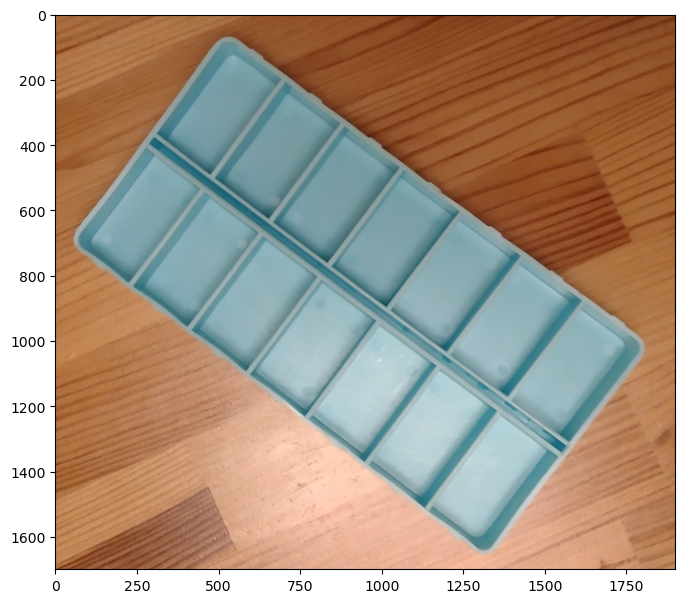

In [9]:
pillbox = cv2.imread('Lab5_dane/pillbox.png')
plt.subplots(1, 1, figsize=(8,8))[1].imshow(pillbox[..., ::-1]);

Rozwiązanie:

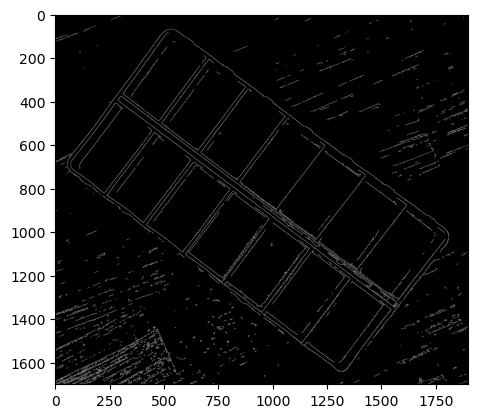

In [10]:
edges = cv2.Canny(pillbox, 50, 100)

plt.imshow(edges, cmap='gray');

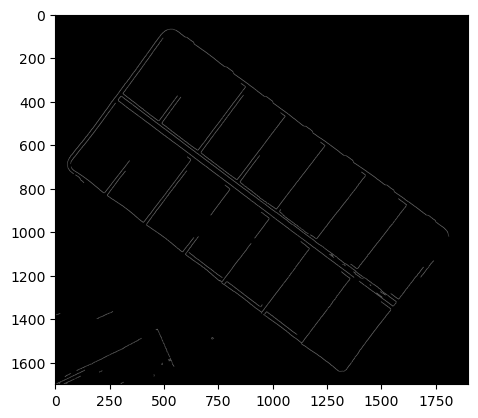

In [16]:
pillbox_blurred = cv2.GaussianBlur(pillbox, (5, 5), 0)

edges = cv2.Canny(pillbox_blurred, 80, 150)

plt.imshow(edges, cmap='gray');

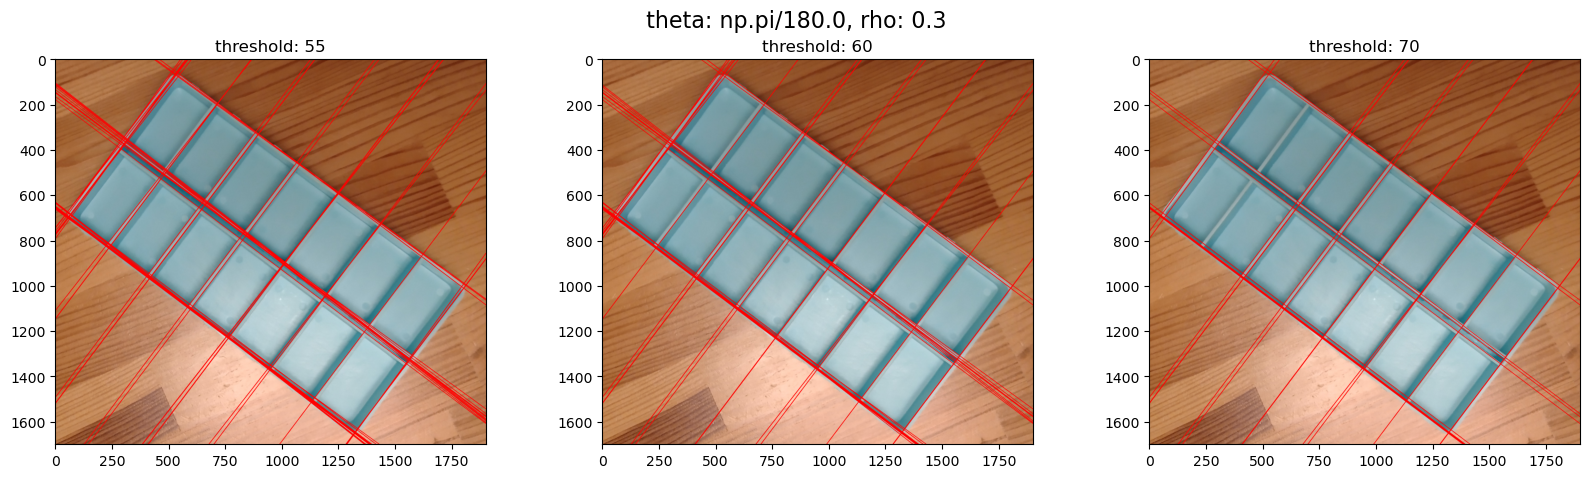

In [19]:
hough_lines_transform(edges, pillbox, rho=0.3, theta=np.pi/180, thresholds=[55, 60, 70])

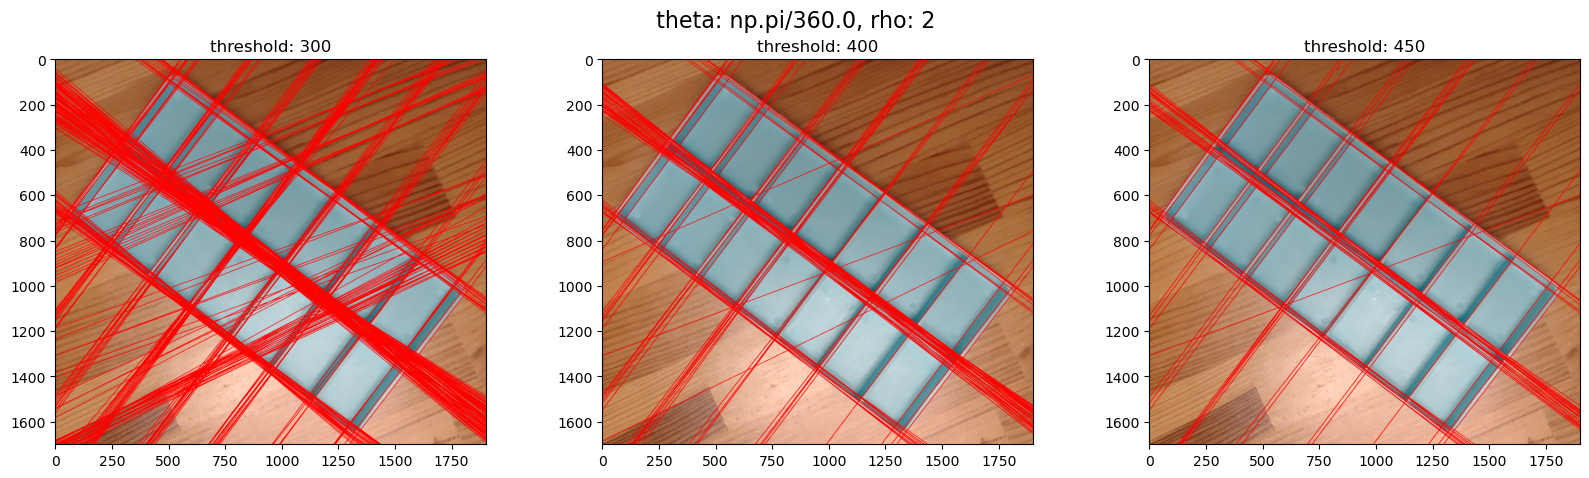

In [13]:
hough_lines_transform(edges, pillbox, rho=2, theta=np.pi/360, thresholds=[300, 400, 450])